<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B03%5D%20-%20Modelos%20Supervisados%20Alternativos/Supervisados_Alternativos_Ejercicio_4_svm_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervisados Alternativos - Ejercicio 4: svm_iris.ipynb

Este notebook es un **I do** completamente resuelto.

## Objetivos

- Cargar y explorar el dataset Iris.
- Entrenar SVM lineal y SVM con kernel RBF.
- Visualizar fronteras de decisión y vectores de soporte (2D y PCA).
- Comparar métricas (accuracy, matriz de confusión, classification report) y discutir trade-offs.

## Descripción del dataset

Iris: 150 muestras, 3 clases (setosa, versicolor, virginica), 4 features (sepal length/width, petal length/width). Dataset ideal para visualizar clasificadores y márgenes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
np.random.seed(42)

In [2]:
# 1) Cargar dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
target_names = iris.target_names

print('Dimensiones:', X.shape)
display(X.head())
print('\nDistribución por clase:')
display(y.value_counts())

Dimensiones: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Distribución por clase:


,count
species,
0,50
1,50
2,50


## 2) Preprocesado: escalado

SVM es sensible a la escala de las features. Aplicamos `StandardScaler` a todas las columnas numéricas.

In [3]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
display(X_scaled.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,-1.468455e-15,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal width (cm),150.0,-1.823726e-15,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal length (cm),150.0,-1.610564e-15,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal width (cm),150.0,-9.473903e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


## 3) División train/test (estratificada)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print('Train:', X_train.shape, 'Test:', X_test.shape)
display(y_train.value_counts(normalize=True).round(3))
display(y_test.value_counts(normalize=True).round(3))

Train: (120, 4) Test: (30, 4)


,proportion
species,
0,0.333
2,0.333
1,0.333


,proportion
species,
0,0.333
2,0.333
1,0.333


## 4) Entrenamiento: SVM lineal (kernel='linear')

In [11]:
# Creamos y entrenamos un SVM lineal
svm_lin = SVC(kernel='linear', C=1.0, probability=True)
svm_lin.fit(X_train, y_train)
y_pred_lin = svm_lin.predict(X_test)

In [12]:
print('Accuracy SVM lineal:', accuracy_score(y_test, y_pred_lin))
print('\nClassification report (SVM lineal):\n')
print(classification_report(y_test, y_pred_lin, target_names=target_names))

Accuracy SVM lineal: 1.0

Classification report (SVM lineal):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



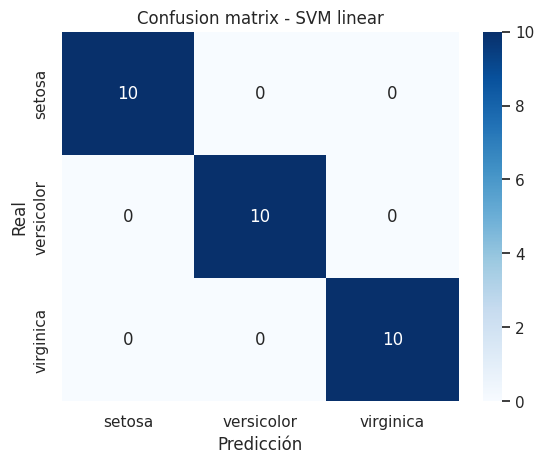

In [13]:
cm_lin = confusion_matrix(y_test, y_pred_lin)
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion matrix - SVM linear')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 5) Entrenamiento: SVM con kernel RBF (kernel='rbf')

In [14]:
# SVM RBF con parámetros por defecto (gamma='scale') y C=1.0
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [15]:
print('Accuracy SVM RBF:', accuracy_score(y_test, y_pred_rbf))
print('\nClassification report (SVM RBF):\n')
print(classification_report(y_test, y_pred_rbf, target_names=target_names))


Accuracy SVM RBF: 0.9666666666666667

Classification report (SVM RBF):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



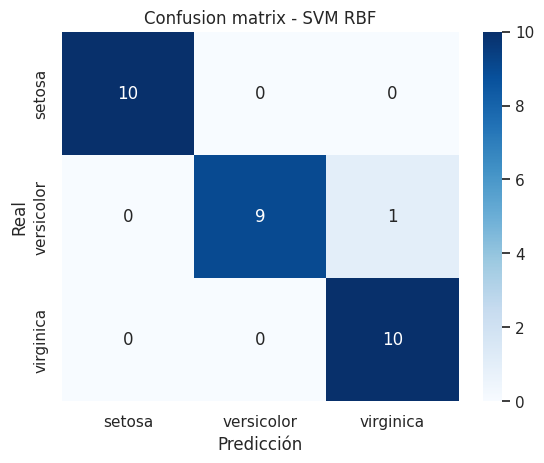

In [16]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion matrix - SVM RBF')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 6) Comparativa simple de métricas

In [17]:
metrics = pd.DataFrame({
    'model': ['svm_linear','svm_rbf'],
    'accuracy': [accuracy_score(y_test, y_pred_lin), accuracy_score(y_test, y_pred_rbf)]
})
metrics

,model,accuracy
0,svm_linear,1.000000
1,svm_rbf,0.966667


## 7) Visualización de márgenes y vectores de soporte en 2D (dos features)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

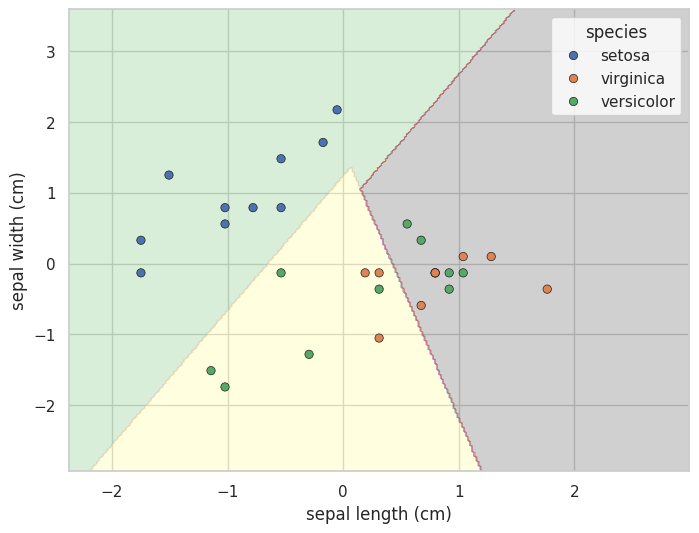

In [19]:
# Para visualizar márgenes usamos las dos primeras features (sepal length, sepal width)
feature_idx = [0, 1]
X2 = X_scaled.iloc[:, feature_idx]
X2_train, X2_test = X2.loc[X_train.index], X2.loc[X_test.index]

svm_lin_2d = SVC(kernel='linear', C=1.0)
svm_lin_2d.fit(X2_train, y_train)

xx, yy = np.meshgrid(np.linspace(X2.iloc[:,0].min()-0.5, X2.iloc[:,0].max()+0.5, 300),
                     np.linspace(X2.iloc[:,1].min()-0.5, X2.iloc[:,1].max()+0.5, 300))
Z = svm_lin_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
sns.scatterplot(x=X2_test.iloc[:,0], y=X2_test.iloc[:,1], hue=y_test.map({0:target_names[0],1:target_names[1],2:target_names[2]}),
                palette='deep', edgecolor='k')


## 8) Visualización en espacio PCA (todas las features -> 2D)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


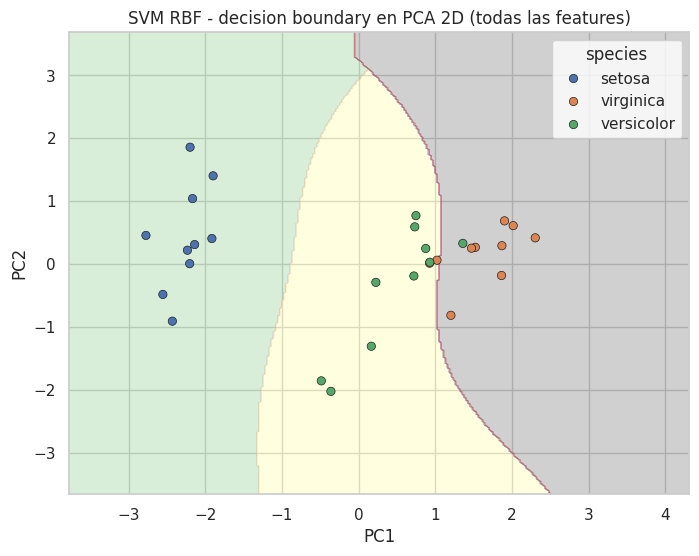

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
X_pca_train, X_pca_test = X_pca_df.loc[X_train.index], X_pca_df.loc[X_test.index]

svm_rbf_pca = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_pca.fit(X_pca_train, y_train)

xx, yy = np.meshgrid(np.linspace(X_pca_df['PC1'].min()-1, X_pca_df['PC1'].max()+1, 300),
                     np.linspace(X_pca_df['PC2'].min()-1, X_pca_df['PC2'].max()+1, 300))
Z = svm_rbf_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
sns.scatterplot(x=X_pca_test['PC1'], y=X_pca_test['PC2'], hue=y_test.map({0:target_names[0],1:target_names[1],2:target_names[2]}),
                palette='deep', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM RBF - decision boundary en PCA 2D (todas las features)')
plt.show()

## 9) Sensibilidad a hiperparámetros

Probamos manualmente C en {0.1, 1, 10} y, para RBF, gamma en {0.01, 0.1, 1}. Comparamos accuracy en test para ver el efecto de regularización y del kernel.

In [10]:
Cs = [0.1, 1, 10]
gammas = [0.01, 0.1, 1]
records = []
for C in Cs:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    acc = accuracy_score(y_test, svm.predict(X_test))
    records.append({'model':'linear','C':C,'gamma':None,'accuracy':acc})
for C in Cs:
    for g in gammas:
        svm = SVC(kernel='rbf', C=C, gamma=g)
        svm.fit(X_train, y_train)
        acc = accuracy_score(y_test, svm.predict(X_test))
        records.append({'model':'rbf','C':C,'gamma':g,'accuracy':acc})
pd.DataFrame(records).sort_values(['model','accuracy'], ascending=[True,False]).reset_index(drop=True)

,model,C,gamma,accuracy
0,linear,1.0,NaN,1.000000
1,linear,10.0,NaN,0.966667
2,linear,0.1,NaN,0.933333
3,rbf,0.1,1.00,0.966667
4,rbf,1.0,0.10,0.966667
5,rbf,1.0,1.00,0.966667
6,rbf,10.0,0.01,0.966667
7,rbf,10.0,0.10,0.966667
8,rbf,10.0,1.00,0.966667
9,rbf,0.1,0.10,0.866667


## 10) Conclusión
- SVM lineal es rápido y funciona bien cuando las clases son linealmente separables en el espacio transformado; RBF añade flexibilidad con el coste de coste computacional y riesgo de overfitting si gamma es alto.
- Aumentar C reduce el margen (menos regularización) y puede aumentar precisión de entrenamiento a costa de generalización.
- Visualizar vectores de soporte y fronteras ayuda a entender por qué SVM puede ser robusto en datasets con pocos ejemplos.